In [1]:
import numpy as np
from BFGS import BFGSDenoiser

# Image Denoising
## Loading Data and Adding Noise

In [2]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

train_y = faces['images'][0]
test_y = faces['images'][1]

In [3]:
train_x = train_y + np.random.randn(train_y.shape[0], train_y.shape[1]) / 50
test_x = test_y + np.random.randn(test_y.shape[0], test_y.shape[1]) / 50

train_x = np.clip(train_x, 0, 1)
test_x = np.clip(test_x, 0, 1)

## Denoising

In [4]:
np.random.seed(42)

ROW, COL = 9, 9
SGD_denoiser = BFGSDenoiser(ROW,COL)

SGD_denoiser.fit(train_x, train_y, epochs=200, lr=0.5)

## Visualizing the Output

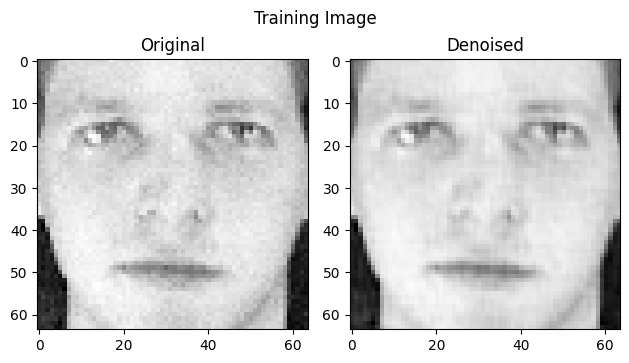

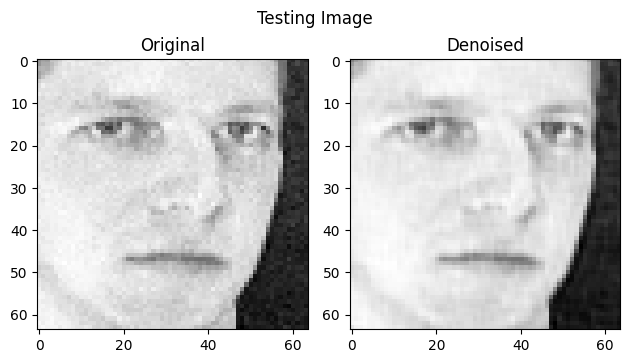

In [5]:
import matplotlib.pyplot as plt

def plot_denoised_img(input, title):
    fig, ax = plt.subplots(1,2)

    pred = SGD_denoiser.predict(input)

    ax[0].imshow(input, cmap = "Grays_r")
    ax[1].imshow(pred, cmap = "Grays_r")

    ax[0].set_title("Original")
    ax[1].set_title("Denoised")

    fig.suptitle(title, y=0.85)
    plt.tight_layout()

    plt.show()

plot_denoised_img(train_x, "Training Image")
plot_denoised_img(test_x, "Testing Image")

## Visualizing the Filter

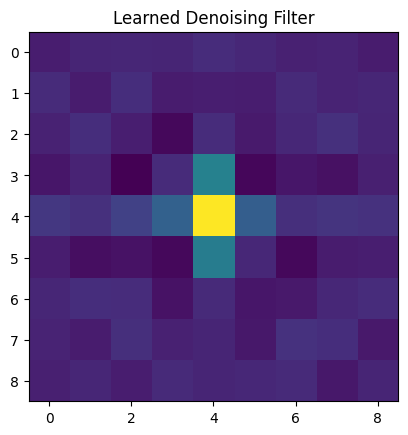

In [6]:
filter = SGD_denoiser.get_filter()

plt.imshow(filter)
plt.title("Learned Denoising Filter")
plt.show()